In [47]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
network = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [7]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Before training, we need to preprocess the data into the shape that thet network expects and normalizing the pixel values into the range [0, 1].

In [8]:
train_images[0].max()

255

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [10]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
train_labels = to_categorical(train_labels)

In [13]:
train_labels[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [14]:
test_labels = to_categorical(test_labels)

In [15]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2588 - accuracy: 0.9246
Epoch 2/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.1039 - accuracy: 0.9690
Epoch 3/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0686 - accuracy: 0.9790
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0482 - accuracy: 0.9857
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0379 - accuracy: 0.9888


In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
print(f'test_acc: {test_acc:.3f}')

test_acc: 0.979


In [18]:
import matplotlib.pyplot as plt

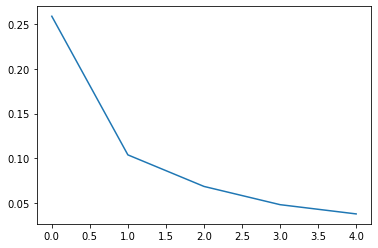

In [19]:
plt.plot(history.history['loss'])

# Element-wise Operations

## Implementation of Naive Relu

In [20]:
def naive_relu(x):
    assert len(x.shape) == 2 # 2D numpy tensor
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [21]:
x = np.random.randint(-10, 10, (3,3))

In [22]:
naive_relu(x)

array([[0, 0, 3],
       [0, 7, 7],
       [0, 0, 9]])

In [23]:
x

array([[-10,  -1,   3],
       [ -6,   7,   7],
       [ -7,   0,   9]])

In [24]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [25]:
y = np.random.randint(0, 10, (3,3))

In [26]:
y

array([[1, 5, 4],
       [5, 5, 1],
       [7, 2, 1]])

In [27]:
naive_add(x, y)

array([[-9,  4,  7],
       [-1, 12,  8],
       [ 0,  2, 10]])

In [28]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

The above function performs _broadcasting_ operations, where the 1D vector y is broadcast virtually to the shape of x. You can see that a new 2D tensor is not created. Instead, y is simply added to all the rows of x.

In [29]:
y = np.random.randint(0, 10, (3,))

In [30]:
y

array([2, 8, 9])

In [31]:
naive_add_matrix_and_vector(x, y)

array([[-8,  7, 12],
       [-4, 15, 16],
       [-5,  8, 18]])

In [32]:
x

array([[-10,  -1,   3],
       [ -6,   7,   7],
       [ -7,   0,   9]])

## Tensor dot

In [33]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [34]:
x

array([[-10,  -1,   3],
       [ -6,   7,   7],
       [ -7,   0,   9]])

In [35]:
y

array([2, 8, 9])

In [36]:
naive_vector_dot(x, y)

array([ -1., 107.,  67.])

## Full matrix dot product

The below function can be applied to any two vectors or matrices that meet the criteria of the "inside dimesions" matching. The matrix product z has dimensions such that during operations, the row of z matches the row of x and the column of z matches the column of y. There needs to be a third iteration variable, m, that is used to carry out the operation.

In [37]:
def naive_matrix_dot(x, y):
    assert x.shape[1] == y.shape[0]
    
    z = np.zeros((x.shape[0], y.shape[1]))
    for j in range(z.shape[1]):
        for k in range(x.shape[0]):
            a = 0
            for m in range(y.shape[0]):
                a += x[k, m] * y[m, j]
            z[k, j] = a
    return z

In [38]:
x = np.random.randint(-10, 10, (4, 2))

In [39]:
y = np.random.randint(-10, 10, (2, 4))

In [40]:
np.allclose(np.dot(x, y), naive_matrix_dot(x, y))

True

In [41]:
np.dot(x, y)

array([[ 11,   2, -29, -38],
       [-51, -51,  -3,  78],
       [ 42,  37, -14, -76],
       [ 53,  56,  13, -74]])

In [42]:
naive_matrix_dot(x, y)

array([[ 11.,   2., -29., -38.],
       [-51., -51.,  -3.,  78.],
       [ 42.,  37., -14., -76.],
       [ 53.,  56.,  13., -74.]])

# Gradient Descent

## Momentum

Momentum is a parameter that attempts to prevent the gradient descent algorithm form becoming stuck in a local minimum by taking the concept from physics. Instead of only updating the parameters based on the current gradient value, momentum uses the previous parameter update as well. A naive implementation is below. The velocity update can be taken as $velocity = past\_velocity * momentum + learning\_rate * gradient$. Then, the update will occur as $w = w + momentum * velociity - learning\_rate * gradient$ 

## Backpropagation

TensorFlow relies on symbolic differentiation to establish a gradient function for the entire network. This is shown in my hand notes for computing the gradient of a network based on the computational graph.

In [48]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1076)